<a href="https://colab.research.google.com/github/itsmesaadali/Artificial-intelligence-Project/blob/main/AI_LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Fruit Price Visualization

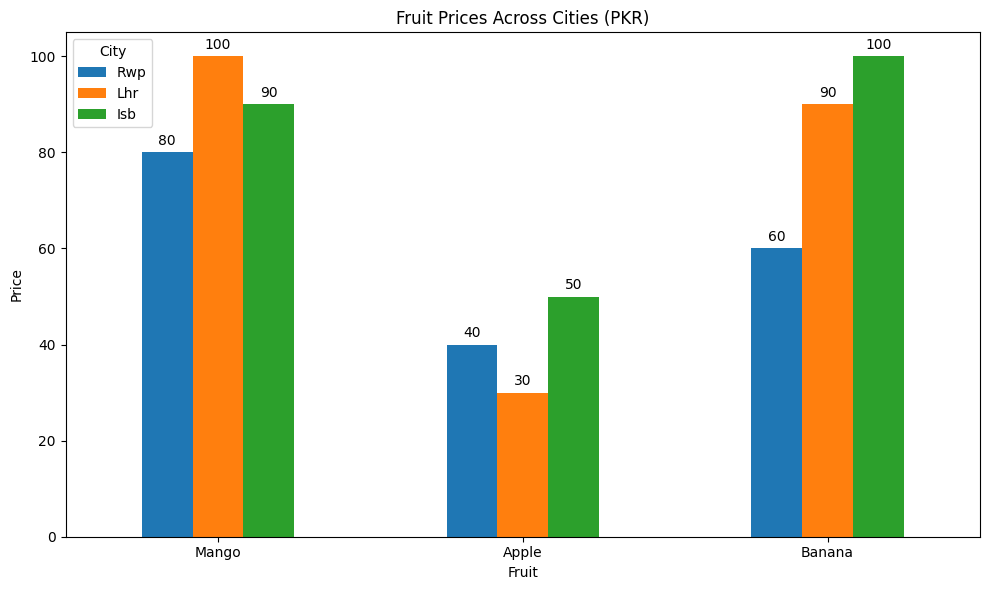

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create dictionary and DataFrame
data = {
    'Fruits': ['Mango', 'Apple', 'Banana'],
    'Rwp': [80, 40, 60],
    'Lhr': [100, 30, 90],
    'Isb': [90, 50, 100]
}
df = pd.DataFrame(data)

# Step 2: Set 'Fruits' as index for plotting
df.set_index('Fruits', inplace=True)

# Step 3: Plot bar graph
ax = df.plot.bar(figsize=(10, 6))
plt.title('Fruit Prices Across Cities (PKR)')
plt.ylabel('Price')
plt.xlabel('Fruit')
plt.xticks(rotation=0)
plt.legend(title='City')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

Task 2: Student Score Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create dataset with missing values and duplicates
data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Math': [85, 90, 78, 92, np.nan, 76, 95, 89, 84, 91, 90],  # Duplicate row (ID 11 = ID 2)
    'Science': [88, 92, 80, 95, 87, 79, np.nan, 90, 85, 93, 92],
    'English': [90, 85, 82, 91, 89, np.nan, 92, 88, 86, 94, 85]
}
df = pd.DataFrame(data)

# Display first 5 rows
print("First 5 rows:\n", df.head())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())


First 5 rows:
    Student_ID  Math  Science  English
0           1  85.0     88.0     90.0
1           2  90.0     92.0     85.0
2           3  78.0     80.0     82.0
3           4  92.0     95.0     91.0
4           5   NaN     87.0     89.0

Summary Statistics:
        Student_ID       Math   Science    English
count   11.000000  10.000000  10.00000  10.000000
mean     6.000000  87.000000  88.10000  88.200000
std      3.316625   6.164414   5.42525   3.705851
min      1.000000  76.000000  79.00000  82.000000
25%      3.500000  84.250000  85.50000  85.250000
50%      6.000000  89.500000  89.00000  88.500000
75%      8.500000  90.750000  92.00000  90.750000
max     11.000000  95.000000  95.00000  94.000000

Missing Values:
 Student_ID    0
Math          1
Science       1
English       1
dtype: int64


Step 2: Handle Missing Values & Duplicates

In [3]:
# Fill NaN with column mean
df['Math'].fillna(df['Math'].mean(), inplace=True)
df['Science'].fillna(df['Science'].mean(), inplace=True)
df['English'].fillna(df['English'].mean(), inplace=True)

# Remove duplicates (based on subject scores)
df.drop_duplicates(subset=['Math', 'Science', 'English'], inplace=True)
print("\nAfter cleaning:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  10 non-null     int64  
 1   Math        10 non-null     float64
 2   Science     10 non-null     float64
 3   English     10 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 400.0 bytes

After cleaning:
 None


/tmp/ipython-input-4270261750.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Math'].fillna(df['Math'].mean(), inplace=True)
/tmp/ipython-input-4270261750.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Step 3: Data Analysis

In [4]:
# Calculate average per subject
subject_avg = df[['Math', 'Science', 'English']].mean()
print("\nAverage Scores:\n", subject_avg)

# Highest/Lowest per subject
max_scores = df[['Math', 'Science', 'English']].max()
min_scores = df[['Math', 'Science', 'English']].min()
print("\nHighest Scores:\n", max_scores)
print("\nLowest Scores:\n", min_scores)

# Overall average
overall_avg = df[['Math', 'Science', 'English']].mean().mean()
print(f"\nOverall Average Score: {overall_avg:.2f}")


Average Scores:
 Math       86.70
Science    87.71
English    88.52
dtype: float64

Highest Scores:
 Math       95.0
Science    95.0
English    94.0
dtype: float64

Lowest Scores:
 Math       76.0
Science    79.0
English    82.0
dtype: float64

Overall Average Score: 87.64


Step 4: Insert New Column

In [5]:
# Add 'Total_Score' column
df['Total_Score'] = df['Math'] + df['Science'] + df['English']
print("\nDataFrame with Total_Score:\n", df[['Student_ID', 'Total_Score']].head())


DataFrame with Total_Score:
    Student_ID  Total_Score
0           1        263.0
1           2        267.0
2           3        240.0
3           4        278.0
4           5        263.0


Step 5: Visualization

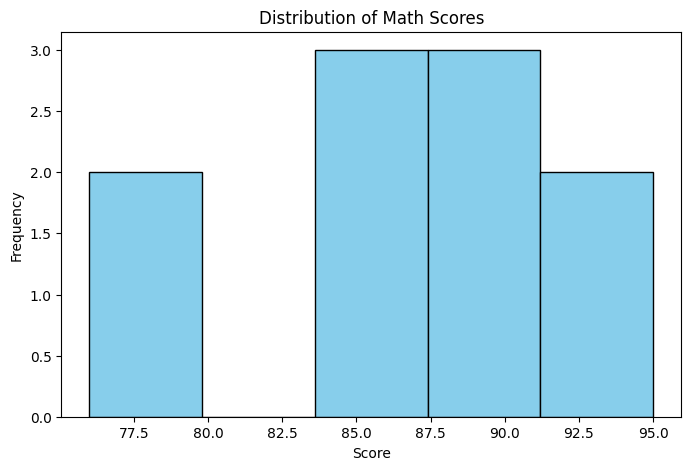

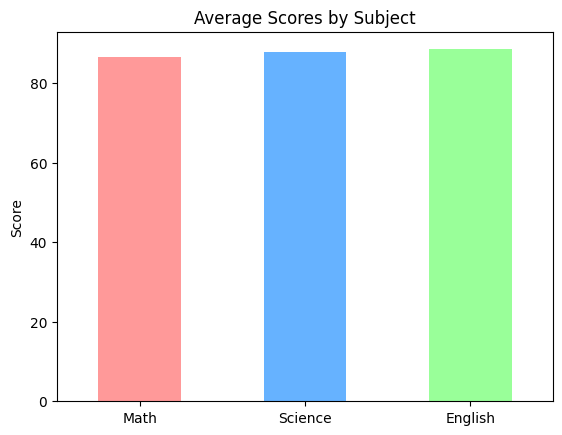

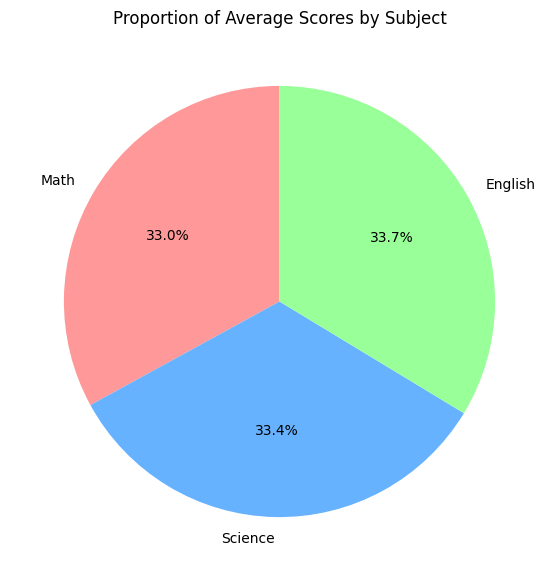

In [6]:
# Histogram for Math scores
plt.figure(figsize=(8, 5))
plt.hist(df['Math'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Math Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Bar plot for subject averages
subject_avg.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Average Scores by Subject')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

# Pie chart for subject average distribution
plt.figure(figsize=(7, 7))
subject_avg.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Proportion of Average Scores by Subject')
plt.ylabel('')
plt.show()